# Problemas del 1 al 6


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import collections
import pandas as pd
import plotly.express as px
from scipy import stats

1. Suponga que se cuenta con una prueba para detectar la enfermedad A, que es positiva el 90%
   de las veces cuando se realiza en un paciente que tiene dicha enfermedad, y es negativa el 95%
   de las veces cuando se realiza en una persona que no tiene la enfermedad. También se sabe que
   la enfermedad afecta a un 1% de la población.

2. Construya una muestra aleatoria de tamaño 100000, que contenga “Sí” y “No”, con
   probabilidades de 1% y 99%, respectivamente.


In [2]:
n = 100000


def crear_muestra_aleatoria():
    return random.choices(["Sí", "No"], k=n, weights=[0.01, 0.99])

In [3]:
muestra = crear_muestra_aleatoria()

df = pd.DataFrame({"Infectado": muestra})
df.head()

Infectado
0        No
1        No
2        No
3        No
4        No

In [4]:
df.value_counts()

Infectado
No           98959
Sí            1041
dtype: int64

In [5]:
def calcular_probabilidad(muestra):
    contador = collections.Counter(muestra)
    return (contador["Sí"] / len(muestra), contador["No"] / len(muestra))


muestra = crear_muestra_aleatoria()
probabilidad = calcular_probabilidad(muestra)

print(probabilidad)

(0.00985, 0.99015)


3. Construya una muestra aleatoria a partir del vector de valores (“Negativo” y “Positivo”), que
   de cuenta de que la probabilidad de que el test salga “Negativo” dado que “No” tiene la
   enfermedad A es del 90%. Presente tablas de contingencia cruzadas condicionadas de acuerdo
   con si tiene o no tiene la enfermedad.


4. Construya una muestra aleatoria a partir del vector de valores (“Negativo” y “Positivo”), que
   de cuenta de que la probabilidad de que el test salga “Positivo” dado que “Sí” tiene la
   enfermedad A es del 90%. Presente tablas de contingencia cruzadas condicionadas de acuerdo
   con si tiene o no tiene la enfermedad.


In [6]:
# Agregar la columna "Resultado_test" basada en las reglas de probabilidad
df["Resultado_test"] = np.where(
    (df["Infectado"] == "Sí") & (np.random.rand(n) < 0.9), "Positivo", "Negativo"
)
df.loc[
    (df["Infectado"] == "No") & (np.random.rand(n) < 0.05), "Resultado_test"
] = "Positivo"

# Verificar la proporción final de "Resultado_test"
proporcion_resultado = df["Resultado_test"].value_counts(normalize=True)
print(proporcion_resultado)

Negativo    0.9412
Positivo    0.0588
Name: Resultado_test, dtype: float64


In [7]:
df.groupby(["Infectado", "Resultado_test"])[["Resultado_test"]].count()

Resultado_test
Infectado Resultado_test                
No        Negativo                 94021
          Positivo                  4938
Sí        Negativo                    99
          Positivo                   942

In [8]:
df.groupby(["Resultado_test", "Infectado"])[["Resultado_test"]].count()

Resultado_test
Resultado_test Infectado                
Negativo       No                  94021
               Sí                     99
Positivo       No                   4938
               Sí                    942

In [9]:
df

Infectado Resultado_test
0            No       Negativo
1            No       Positivo
2            No       Negativo
3            No       Negativo
4            No       Negativo
...         ...            ...
99995        No       Negativo
99996        No       Negativo
99997        No       Negativo
99998        No       Negativo
99999        No       Negativo

[100000 rows x 2 columns]

5. Calcule la probabilidad de tener la enfermedad dado que el test salió positivo. Realice los
   cálculos utilizando las variables simuladas.


In [10]:
pacientes_infectados_positivos = df[
    (df["Infectado"] == "Sí") & (df["Resultado_test"] == "Positivo")
]
pacientes_infectados_positivos = pacientes_infectados_positivos.shape[0]

pacientes_positivos = df[df["Resultado_test"] == "Positivo"]
pacientes_positivos = pacientes_positivos.shape[0]


probabilidad_infectado_verdadero_positivo = (
    pacientes_infectados_positivos / pacientes_positivos
)

print(f"Infectados con test positivo: {pacientes_infectados_positivos}")
print(f"Total test positivos: {pacientes_positivos}")
print(
    f"Probabilidad de estar infectado con test positivo:  {probabilidad_infectado_verdadero_positivo}"
)

Infectados con test positivo: 942
Total test positivos: 5880
Probabilidad de estar infectado con test positivo:  0.16020408163265307


6. Realice los cálculos del punto anterior, utilizando la información del enunciado y el Teorema
   de Bayes. ¿Qué puede concluir?


Para calcular la probabilidad de tener la enfermedad dado que el test salió positivo utilizando el Teorema de Bayes y la información del enunciado, podemos seguir los pasos que se mencionaron previamente. Aquí está el cálculo:

1. Probabilidad de tener la enfermedad (P(Enfermedad)):

   - En el enunciado, se menciona que el 1% de la muestra tiene la enfermedad, por lo que \(P({Enfermedad}) = 0.01\).

2. Probabilidad de obtener un resultado positivo en el test dado que se tiene la enfermedad (P(Positivo | Enfermedad)):

   - En el enunciado, se establece que el 90% de las personas infectadas obtiene un resultado positivo, es decir, \(P({Positivo} | {Enfermedad}) = 0.9\).

3. Probabilidad de no tener la enfermedad (P(¬Enfermedad)):

   - \(P({¬Enfermedad}) = 1 - P({Enfermedad}) = 0.99\).

4. Probabilidad de obtener un resultado positivo en el test dado que no se tiene la enfermedad (P(Positivo | ¬Enfermedad)):

   - En el enunciado, se establece que el 5% de las personas no infectadas obtiene un resultado positivo, es decir, \(P({Positivo} | {¬Enfermedad}) = 0.05\).

5. Probabilidad de obtener un resultado positivo en el test (P(Positivo)):

   - Utilizando el teorema de probabilidad total:
     \[P({Positivo}) = P({Positivo} | {Enfermedad}) \cdot P({Enfermedad}) + P({Positivo} | {¬Enfermedad}) \cdot P({¬Enfermedad})\]
   - Sustituyendo los valores:
     \[P({Positivo}) = 0.9 \cdot 0.01 + 0.05 \cdot 0.99\]
     \[P({Positivo}) = 0.0145\]

6. Probabilidad de tener la enfermedad dado que el test salió positivo (P(Enfermedad | Positivo)):
   - Utilizando el Teorema de Bayes:
     \[P({Enfermedad} | {Positivo}) = \frac{P({Positivo} | {Enfermedad}) \cdot P({Enfermedad})}{P({Positivo})}\]
   - Sustituyendo los valores:
     \[P({Enfermedad} | {Positivo}) = \frac{0.9 \cdot 0.01}{0.0145} \approx 0.6207\]

Por lo tanto, la probabilidad de tener la enfermedad dado que el test salió positivo es aproximadamente 0.6207 o alrededor del 62.07%. Esto significa que si alguien obtiene un resultado positivo en el test, la probabilidad de que realmente tenga la enfermedad es del 62.07%.


In [11]:
# Probabilidad de tener la enfermedad (P(Enfermedad))
p_enfermedad = 0.01

# Probabilidad de obtener un resultado positivo en el test dado que se tiene la enfermedad (P(Positivo | Enfermedad))
p_positivo_enfermedad = 0.9

# Probabilidad de no tener la enfermedad (P(¬Enfermedad))
p_no_enfermedad = 1 - p_enfermedad

# Probabilidad de obtener un resultado positivo en el test dado que no se tiene la enfermedad (P(Positivo | ¬Enfermedad))
p_positivo_no_enfermedad = 0.05

# Probabilidad de obtener un resultado positivo en el test (P(Positivo))
p_positivo = (p_positivo_enfermedad * p_enfermedad) + (
    p_positivo_no_enfermedad * p_no_enfermedad
)

# Probabilidad de tener la enfermedad dado que el test salió positivo (P(Enfermedad | Positivo))
p_enfermedad_positivo = (p_positivo_enfermedad * p_enfermedad) / p_positivo

print(
    "Probabilidad de tener la enfermedad dado que el test salió positivo:",
    p_enfermedad_positivo,
)

Probabilidad de tener la enfermedad dado que el test salió positivo: 0.15384615384615385


# Problema 7


Simule 1000 valores para cada una de las distribuciones de probabilidad uniforme discreta,
binomial, Poisson, uniforme continua, normal y Exponencial. Especifique libremente los
parámetros para cada una de ellas. Encuentre media y desviación estándar muestral para cada
uno de los vectores simulados y compare dichos resultados con los obtenidos con las fórmulas
de valor esperado y desviación estándar teoricos.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Distribución de probabilidad uniforme discreta


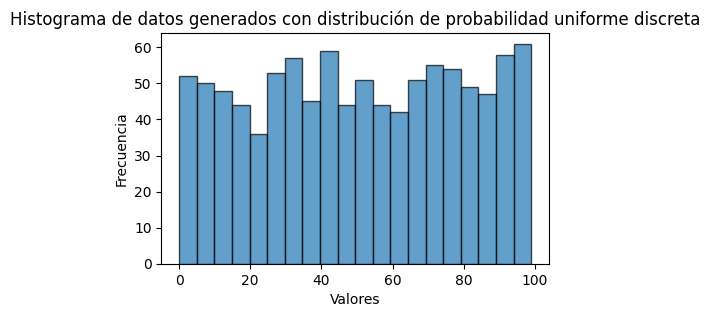

In [13]:
N = 1000
a_uniforme_discreta = 0
b_uniforme_discreta = 100

dpud = np.random.randint(low=a_uniforme_discreta, high=b_uniforme_discreta, size=N)

plt.figure(figsize=(5, 3))
plt.hist(dpud, bins=20, edgecolor="k", alpha=0.7)
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.title(
    "Histograma de datos generados con distribución de probabilidad uniforme discreta"
)

# Mostrar la gráfica
plt.show()

### Distribución de probabilidad binomial


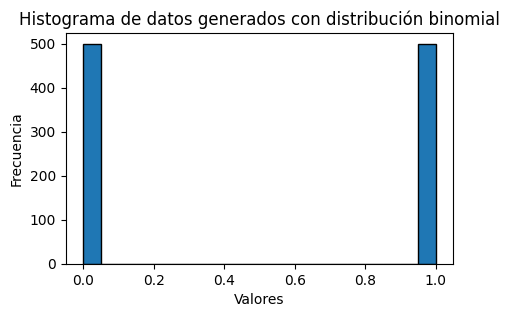

In [14]:
n_binomial = 1
p_binomial = 0.5

dpb = np.random.binomial(n=n_binomial, p=p_binomial, size=N)

plt.figure(figsize=(5, 3))
plt.hist(dpb, bins=20, edgecolor="k")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.title("Histograma de datos generados con distribución binomial")

# Mostrar la gráfica
plt.show()

### Distribución de probabilidad poisson


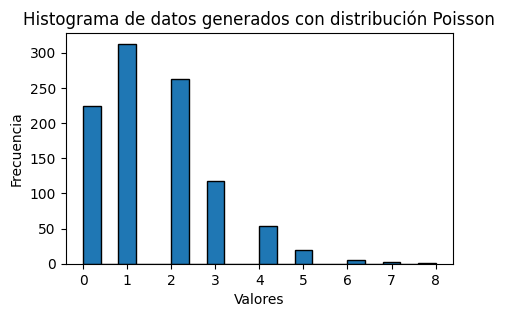

In [15]:
lmbda_poisson = 1.5
dpp = np.random.poisson(lam=lmbda_poisson, size=N)

plt.figure(figsize=(5, 3))
plt.hist(dpp, bins=20, edgecolor="k")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.title("Histograma de datos generados con distribución Poisson")

# Mostrar la gráfica
plt.show()

### Distribuicón uniforme continua


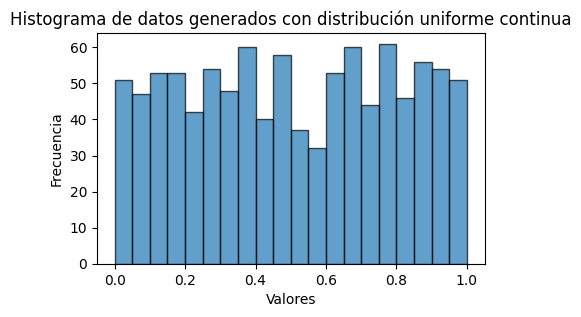

In [16]:
a_uniforme_continua = 0
b_uniforme_continua = 1
duc = np.random.uniform(low=a_uniforme_continua, high=b_uniforme_continua, size=N)

plt.figure(figsize=(5, 3))
plt.hist(duc, bins=20, edgecolor="k", alpha=0.7)
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.title("Histograma de datos generados con distribución uniforme continua")

# Mostrar la gráfica
plt.show()

### Distribuicón normal


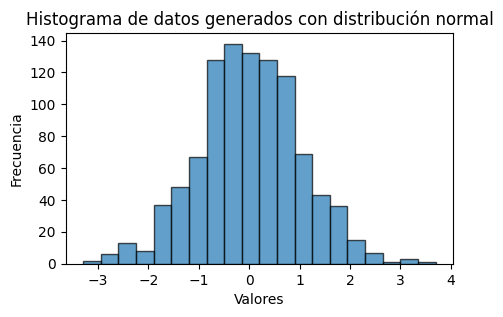

In [17]:
mu_normal = 0
sigma_normal = 1

dnorm = np.random.normal(loc=mu_normal, scale=sigma_normal, size=N)

plt.figure(figsize=(5, 3))
plt.hist(dnorm, bins=20, edgecolor="k", alpha=0.7)
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.title("Histograma de datos generados con distribución normal")

# Mostrar la gráfica
plt.show()

### Distribución Exponencial


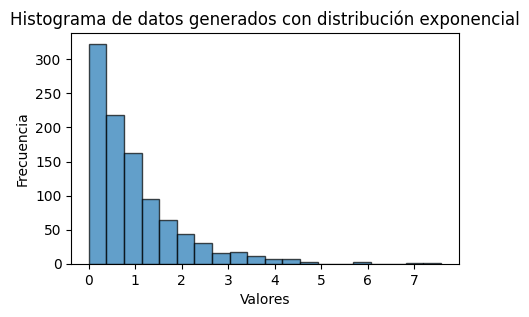

In [18]:
lmbda_exponencial = 1
dexp = np.random.exponential(scale=lmbda_exponencial, size=N)


plt.figure(figsize=(5, 3))
plt.hist(dexp, bins=20, edgecolor="k", alpha=0.7)
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.title("Histograma de datos generados con distribución exponencial")

# Mostrar la gráfica
plt.show()

### Media y Desviación Estándar de las muestras simuladas


In [19]:
df_resumen = pd.DataFrame(
    {
        "dist_prob_unif_dis": dpud,
        "dist_prob_binom": dpb,
        "dist_prob_poisson": dpp,
        "dist_prob_unif_cont": duc,
        "dist_prob_norm": dnorm,
        "dist_prob_exp": dexp,
    }
)
df_resumen.describe()

dist_prob_unif_dis  dist_prob_binom  dist_prob_poisson  \
count         1000.000000       1000.00000        1000.000000   
mean            50.669000          0.50000           1.562000   
std             29.266225          0.50025           1.306086   
min              0.000000          0.00000           0.000000   
25%             26.000000          0.00000           1.000000   
50%             51.000000          0.50000           1.000000   
75%             76.000000          1.00000           2.000000   
max             99.000000          1.00000           8.000000   

       dist_prob_unif_cont  dist_prob_norm  dist_prob_exp  
count          1000.000000     1000.000000    1000.000000  
mean              0.504950        0.006953       0.955848  
std               0.293049        1.013733       0.965982  
min               0.000005       -3.292072       0.001192  
25%               0.255183       -0.636944       0.268024  
50%               0.497513        0.028645       0.655743  
75%               0.769530        0.694302       1.335227  
max               0.999937        3.697955       7.570678

### Valores esperados teóricos


In [20]:
# Calcula los valores esperados teóricos (medias) para cada distribución
mu_uniforme_discreta = (a_uniforme_discreta + b_uniforme_discreta) / 2
mu_binomial = n_binomial * p_binomial
mu_poisson = lmbda_poisson
mu_uniforme_continua = (a_uniforme_continua + b_uniforme_continua) / 2
mu_normal_teorico = mu_normal  # En la distribución normal, mu es igual al valor teórico
mu_exponencial = 1 / lmbda_exponencial
#
# Imprime los valores esperados teóricos
print("Valor Esperado Teórico para Uniforme Discreta:", mu_uniforme_discreta)
print("Valor Esperado Teórico para Binomial:", mu_binomial)
print("Valor Esperado Teórico para Poisson:", mu_poisson)
print("Valor Esperado Teórico para Uniforme Continua:", mu_uniforme_continua)
print("Valor Esperado Teórico para Normal:", mu_normal_teorico)
print("Valor Esperado Teórico para Exponencial:", mu_exponencial)

Valor Esperado Teórico para Uniforme Discreta: 50.0
Valor Esperado Teórico para Binomial: 0.5
Valor Esperado Teórico para Poisson: 1.5
Valor Esperado Teórico para Uniforme Continua: 0.5
Valor Esperado Teórico para Normal: 0
Valor Esperado Teórico para Exponencial: 1.0


# Problema 8


Realice secuencialmente la simulación del lanzamiento de un dado, de manera que en cada
lanzamiento encuentre la proporción de veces que sale el número 5 (es decir, vamos a estimar
de manera secuencial con el enfoque frecuentista del evento que al lanzar un dado se obtenga
el número 5). Comente los resultados de cómo es la probabilidad cuando se hacen: 2
lanzamientos, 6 lanzamientos, 10 lanzamientos, 100 lanzamientos, 1000 lanzamientos. ¿La
proporción de veces que sale el dado es equivalente a la teórica? Adicionalmente, construya
un gráfico donde se evidencie la evolución de la proporción vs la cantidad de veces que se
lanza el dado, interprete los resultados


In [21]:
import numpy as np
import pandas as pd
import plotly.express as px

In [22]:
# Configuración de la simulación
np.random.seed(0)  # Establecer una semilla aleatoria para reproducibilidad
num_lanzamientos = 1000  # Número total de lanzamientos
lanzamientos = np.random.randint(
    1, 7, size=num_lanzamientos
)  # Simulación de lanzamientos
proporciones = []  # Almacenar la proporción de 5 en cada etapa
puntos_interes = [
    2,
    6,
    10,
    100,
    1000,
]  # Puntos de interés para agregar puntos en el gráfico

# Realizar la simulación secuencial
contador_cinco = 0  # Inicializar el contador de 5
for i in range(num_lanzamientos):
    if lanzamientos[i] == 5:
        contador_cinco += 1
    proporciones.append(
        contador_cinco / (i + 1)
    )  # Calcular la proporción en cada etapa

# Crear un DataFrame para Plotly Express
df = pd.DataFrame(
    {"Lanzamientos": range(1, num_lanzamientos + 1), "Proporción de 5": proporciones}
)

# Agregar puntos de interés
puntos_df = df[df["Lanzamientos"].isin(puntos_interes)]

# Calcular la probabilidad teórica
probabilidad_teorica = 1 / 6

# Crear el gráfico con Plotly Express
fig = px.line(
    df,
    x="Lanzamientos",
    y="Proporción de 5",
    labels={
        "Lanzamientos": "Número de Lanzamientos",
        "Proporción de 5": "Proporción de 5",
    },
    title="Probabilidad de sacar 5 en el lanzamiento de un dado vs Número de Lanzamientos",
)
fig.add_shape(
    type="line",
    y0=probabilidad_teorica,
    y1=probabilidad_teorica,
    x0=1,
    x1=num_lanzamientos,
    line=dict(color="red", dash="dash"),
    name="Probabilidad teórica (1/6)",
)
fig.add_trace(
    px.scatter(puntos_df, x="Lanzamientos", y="Proporción de 5")
    .data[0]
    .update(marker=dict(color="black", size=6))
)

fig.show()

# Problema 9


Realice la simulación de 10000 conjuntos de datos diferentes provenientes de una distribución
(desarrolle el ejercicio primero utilizando la distribución uniforme y posteriormente una
exponencial, utilice los parámetros que desee de las distribuciones), obteniendo 1000 muestras
de cada conjunto de datos. Luego, va a obtener el promedio en cada uno de los conjuntos de datos y proceda a analizar la distribución de las medias obtenidas. ¿Qué evidencia en los histogramas? ¿A cuál de las distribuciones de la clase se le asemeja dicha distribución?


In [23]:
import numpy as np
import matplotlib.pyplot as plt

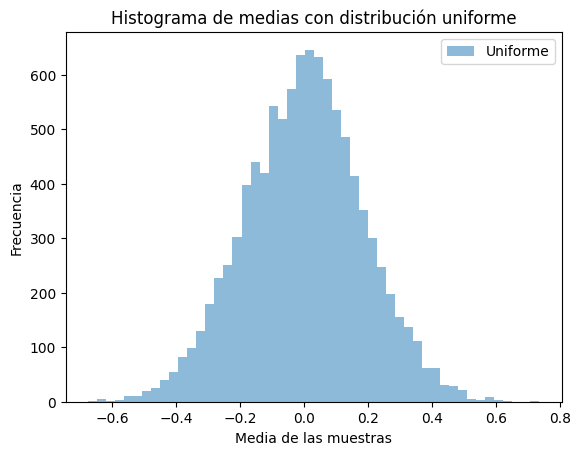

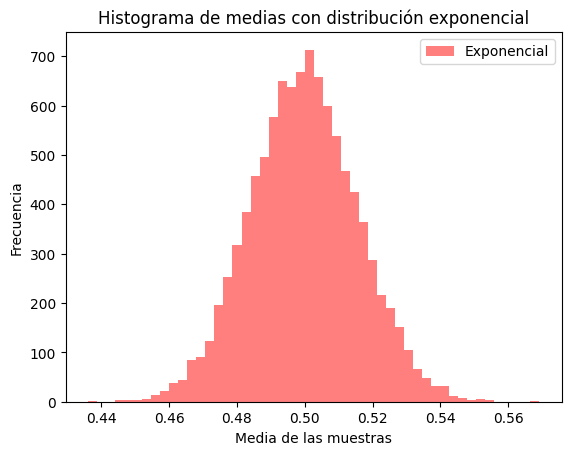

In [24]:
# Configuración de la simulación
num_simulations = 10000
sample_size = 1000

# Distribución uniforme
uniform_means = []

for i in range(num_simulations):
    data = np.random.uniform(-10, 10, sample_size)
    sample_mean = np.mean(data)
    uniform_means.append(sample_mean)

# Distribución exponencial
exponential_means = []

for i in range(num_simulations):
    data = np.random.exponential(0.5, sample_size)
    sample_mean = np.mean(data)
    exponential_means.append(sample_mean)

# Histograma de las medias con distribución uniforme
plt.hist(uniform_means, bins=50, alpha=0.5, label="Uniforme")
plt.xlabel("Media de las muestras")
plt.ylabel("Frecuencia")
plt.title("Histograma de medias con distribución uniforme")
plt.legend()
plt.show()

# Histograma de las medias con distribución exponencial
plt.hist(exponential_means, bins=50, alpha=0.5, color="red", label="Exponencial")
plt.xlabel("Media de las muestras")
plt.ylabel("Frecuencia")
plt.title("Histograma de medias con distribución exponencial")
plt.legend()
plt.show()

Es evidente que la frecuencia de la distribución de medias tiende a tomar una distribución normal alrededor de la media que se le indique en la función generadora de la distribución aleatoria. También se nota que pueden haber algunas desviaciones por lo que este parametro no es estricto.


# Problema 10


![image.png](images/enunciado_problema_10.png)


In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def crear_distri_norm(mu_normal, sigma_normal, N):
    dnorm = np.random.normal(loc=mu_normal, scale=sigma_normal, size=N)
    plt.figure(figsize=(5, 3))
    plt.hist(dnorm, bins=20, edgecolor="k", alpha=0.7)
    plt.xlabel("Valores")
    plt.ylabel("Frecuencia")
    plt.title(f"Histograma de datos generados con distribución normal para n={N}")
    plt.show()
    return dnorm

In [27]:
def comparacion_medias(distribucion):
    n = len(distribucion)
    m = np.mean(distribucion)
    m_ses = (100 * n) / ((n**2) + 1) + m
    return m_ses, m

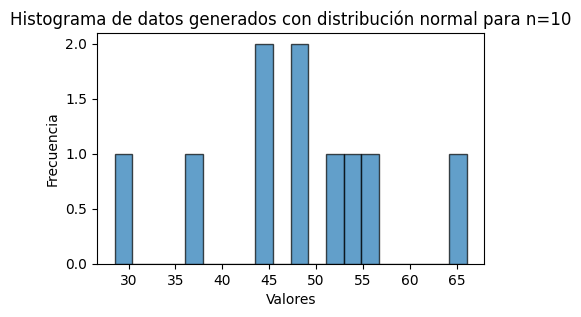

la media sesgada es: 57.4784655202979
la media habitual es: 47.577475421288
la diferencia de medias es: 9.900990099009903


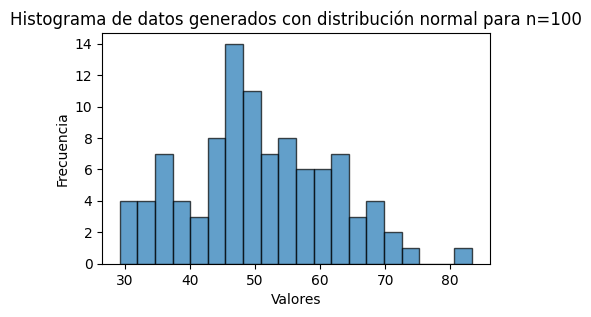

la media sesgada es: 51.704993561137265
la media habitual es: 50.70509355113826
la diferencia de medias es: 0.9999000099990027


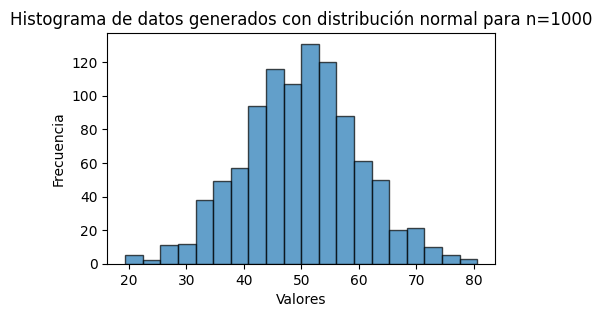

la media sesgada es: 50.01997531151028
la media habitual es: 49.91997541151018
la diferencia de medias es: 0.09999990000009973


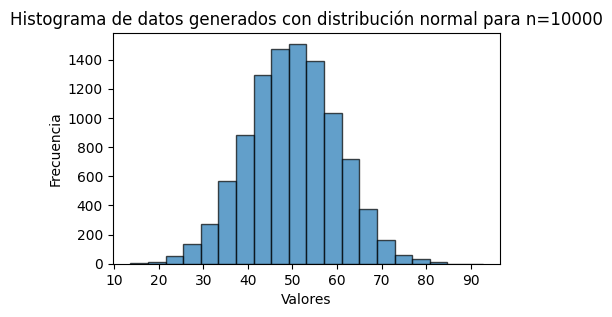

la media sesgada es: 49.975554184752546
la media habitual es: 49.96555418485254
la diferencia de medias es: 0.009999999900003331


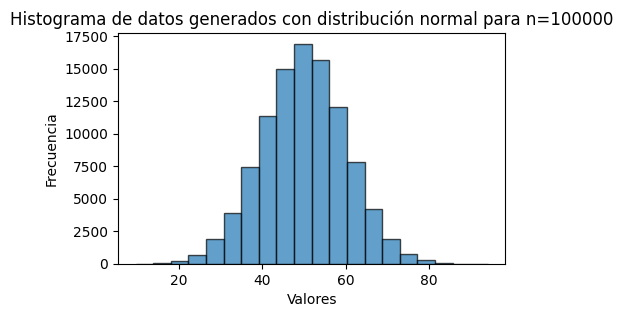

la media sesgada es: 49.97772454780176
la media habitual es: 49.976724547801865
la diferencia de medias es: 0.0009999999998981934


In [28]:
for i in [10, 100, 1000, 10000, 100000]:
    media_sesgada, media = comparacion_medias(crear_distri_norm(50, 10, i))
    print(f"la media sesgada es: {media_sesgada}")
    print(f"la media habitual es: {media}")
    print(f"la diferencia de medias es: {media_sesgada - media}")

Se puede concluir que entre mayor sea la muestra el sesgo disminuye dado que el estimador muestral se acerca al estimador poblacional


# Problema 11


![image.png](images/enunciado_problema_11.png)


In [29]:
import numpy as np

In [30]:
def exponential_distribution(lambda_, n):
    return np.random.exponential(scale=1 / lambda_, size=n)


def first_estimator(data):
    return data[0]


def second_estimator(data):
    result = np.sum(data) - data[len(data) - 1]
    return result / (len(data) - 1)


def third_estimator(data):
    return np.mean(data)


def fourth_estimator(data):
    return np.min(data)

In [31]:
lambda_ = 1
data_lengths = [10, 100, 1000]
for length in data_lengths:
    data = exponential_distribution(lambda_, length)
    print(f"First estimator with {length} data points:", first_estimator(data))
    print(f"Second estimator with {length} data points", second_estimator(data))
    print(f"Third estimatorwith {length} data points", third_estimator(data))
    print(f"Fourth estimator with {length} data points", fourth_estimator(data))
    print("-------------------------------------------------------")

First estimator with 10 data points: 0.9806937159622771
Second estimator with 10 data points 0.8413030157342959
Third estimatorwith 10 data points 1.1765306563646412
Fourth estimator with 10 data points 0.09598457826864273
-------------------------------------------------------
First estimator with 100 data points: 0.9044791082810959
Second estimator with 100 data points 0.8201936720061501
Third estimatorwith 100 data points 0.8210924419445479
Fourth estimator with 100 data points 0.0017210969097680503
-------------------------------------------------------
First estimator with 1000 data points: 0.2561164890843233
Second estimator with 1000 data points 1.0210273033970167
Third estimatorwith 1000 data points 1.0200710509997333
Fourth estimator with 1000 data points 0.002255618209913511
-------------------------------------------------------


Debido a que escogimos un lambda = 1, el estimador muestra que más se acerca es el tercero cuando hay 1000 puntos.
El estimador que menos se acerca en cualquier caso es el cuarto estimador.
El segundo estimador también se acerca bastante cuando hay 1000 puntos.
El primer estimador parece alejarse del valor real a medida que aumenta el número de puntos.

# Problema 12


Considere el archivo SolicitudesDiarias.csv, en el cual se encuentran la cantidad de solicitudes
diarias hechas en una institución de financiera por clientes. El equipo de mercadeo a partir del
primero de febrero de 2022 implementó una campaña que buscaba aumentar la cantidad de
solicitudes diarias realizadas por los clientes, además de que el primero de junio de 2022 lanzó
una modificación a la campaña que tenia el mismo fin (aumentar la cantidad de solicitudes
diarias). ¿Será que las campañas impartidas por el equipo de mercadeo tuvieron el efecto
esperado? Obtenga los intervalos de confianza al 95% que considere para determinar si
efectivamente el promedio diario de solicitudes aumentó con las campañas que lanzó el equipo
de mercadeo. ¿Qué puede concluir al respecto?¿Qué campaña fue más efectiva?


In [32]:
import pandas as pd
from scipy import stats

In [33]:
df = pd.read_csv("data/SolicitudesDiarias.csv")
print(df.shape)
df.head()

(335, 2)


Fecha  Solicitudes
0  2021-10-01         29.0
1  2021-10-02         21.0
2  2021-10-03         26.0
3  2021-10-04         31.0
4  2021-10-05         25.0

In [34]:
df_antes = df[df["Fecha"] < "2022-02-01"]
print(df_antes.shape)
display(df_antes.head())
mean_antes = df_antes["Solicitudes"].mean()
mean_antes

(123, 2)


Fecha  Solicitudes
0  2021-10-01         29.0
1  2021-10-02         21.0
2  2021-10-03         26.0
3  2021-10-04         31.0
4  2021-10-05         25.0

20.585365853658537

In [35]:
df_despues = df[df["Fecha"] >= "2022-02-01"]
print(df_despues.shape)
display(df_despues.head())
mean_despues = df_despues["Solicitudes"].mean()
mean_despues

(212, 2)


Fecha  Solicitudes
123  2022-02-01         32.0
124  2022-02-02         18.0
125  2022-02-03         28.0
126  2022-02-04         23.0
127  2022-02-05         21.0

34.367924528301884

In [36]:
data1 = df_antes["Solicitudes"].to_numpy()
data2 = df_despues["Solicitudes"].to_numpy()
print(len(data1), len(data2))

123 212


In [37]:
t_stat, p_value = stats.ttest_ind(data2, data1, equal_var=False, alternative="greater")

# Nivel de significancia
alpha = 0.05

# Compara el valor p con el nivel de significancia
if p_value < alpha:
    print("Se rechaza la hipótesis nula.")
    print("La media de data2 es mayor que la de data1.")
else:
    print("No se puede rechazar la hipótesis nula.")
    print(
        "No hay suficiente evidencia para concluir que la media de data2 es mayor que la de data1."
    )

print("Estadística t:", t_stat)
print("Valor p:", p_value)

Se rechaza la hipótesis nula.
La media de data2 es mayor que la de data1.
Estadística t: 10.251468090994257
Valor p: 7.607606143979196e-22


# Problema 13


![image.png](images/enunciado_problema_13.png)


![image.png](images/solucion_problema_13.jpeg)


# Problema 14 sección 2.4 ejercicio 1


Para cada una de las partes (a) a través de (d), indique si esperar que el rendimiento de un método de aprendizaje estadístico flexible sea mejor o peor que un método inflexible. Justifique su respuesta.

(a) El tamaño de la muestra n es extremadamente grande, y el número de predictores p es pequeño.

(b) El número de predictores p es extremadamente grande, y el número de observaciones n es pequeño.

(c) La relación entre los predictores y la respuesta no es lineal.

(d) La variación de los términos de error, es decir. varianza = Var(E), es extremadamente alto.


Respuesta


a) En este caso, esperamos que el rendimiento de un método flexible sea mejor que un método inflexible. Esto se debido a que un método flexible tendrá más parámetros para ajustarse a los datos, lo que le permitirá capturar la verdadera relación entre la variable de respuesta y los predictores. En contraste, un método inflexible tendrá menos parámetros para ajustarse a los datos, lo que puede limitar su capacidad para capturar la verdadera relación.


b) Para este punto, el número de predictores es lo suficientemente grande como para que un método flexible pueda adaptarse o aprender de la variabilidad de los datos. Y un método inflexible puede tener dificultades para aprender la relación entre los predictores y la respuesta con precisión, ya que no tiene suficientes grados de libertad para ajustarse a los datos. Es por esto que es probable que un método flexible tenga un rendimiento mejor que un método inflexible en este caso.


c) En este caso, un método inflexible no puede capturar la relación no lineal entre los predictores y la respuesta. Un método flexible puede ajustarse a la relación no lineal, lo que puede mejorar el rendimiento de la predicción. Por lo tanto, es probable que un método flexible tenga un rendimiento mejor que un método inflexible en este caso.


d) En este punto, considerando la alta variación de los datos el método flexible puede tener un rendimiento mejor que un método inflexible. Esto se debe a que un método flexible pueda adaptarse a la alta variación de los términos de error.


# Problema 14 sección 2.4 ejercicio 6


Describe the diferences between a parametric and a non-parametric statistical learning approach. What are the advantages of a parametric approach to regression or classifcation (as opposed to a non-parametric approach)? What are its disadvantages?


Las diferencias entre un enfoque de aprendizaje estadístico **paramétrico** y **no paramétrico** son:

- **Enfoque paramétrico:**

1. Se asume que los datos siguen un **modelo predefinido** con un número de parámetros fijos. Dicho modelo predefinido se basa en suposiciones que se deben cumplir para que los resultados tengan sentido estadístico.

2. Bajo este enfoque los datos deben cumplir alguna distribución de probabilidad estadística específica para que el modelo sea válido.

3. El objetivo principal de este enfoque es estimar los parámetros fijos desconocidos a partir de datos observados.

Las principales ventajas de este enfoque son: Su eficiencia cuando los datos se ajustan a los supuestos de los modelos y, su interpretabilidad de los parámetros estimados.

Por otra parte, su principal desventaja es que si los datos no siguen la distribución adecuada y no cumplen los demás supuestos de los modelos, las estimaciones sobre los parámetros reales no serán acertadas.

- **Enfoque no paramétrico:**

1. Bajo este enfoque el modelo es libre, es decir, no se asume una dsitribución específica de los datos y de trabaja con la menor cantidad de supuestos posibles. Esto causa que el modelo sea flexible y que se ajuste a los datos sin restricciones específicas.

2. Permite que la forma de la relación entre las variables sea determinada por los datos y no por parámetros fijos, esto los hace adecuados para situaciones en las que no se conocen las caracteristicas de la distribución subyacente o cuando la distribución de los datos no se ajusta a una distribución de probabilidad estadística específica.

La principal ventaja del enfoque no paramétrico que su flexibilidad permite permite capturar patrones en los datos sin suponer una distribución estadística específica.

Su desventaja es que la interpretación de los reusltados es más compleja que bajo en el enfoque parámetrico y, en muchos casos, de poco valor.

Por ejemplo, para un modelo de regresión, las ventajas de usa un efoque parámetrico, es que garantiza el cumplimiento de todos sus supuestos y, por lo tanto, los valores estimados son los de menor error y, por lo tanto, se ajustarán muy bien a los valores reales o poblacionales. Por otra parte, si usamos un enfoque no parámetrico, la estimación estaría muy sesgada y su interpretabilidad puede estar completamente desalineada con la realidad.


# Problema 14 sección 2.4 ejercicio 8


## Importando librerías

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## a) Leyendo los datos

In [ ]:
import pandas as pd

college=pd.read_csv("data/College.csv")
print(college.shape)

(777, 19)


## b) Observando los datos y tratando la columna 0

In [ ]:
college.head(3)

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54

In [ ]:
# Opción 1:
college2 = pd.read_csv("data/College.csv", index_col=0)
college2.head(3)

Private  Apps  Accept  Enroll  Top10perc  \
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   

                              Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University        3300    450      2200   70        78   
Adelphi University                  6450    750      1500   29        30   
Adrian College                      3750    400      1165   53        66   

                              S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Abilene Christian University       18.1           12    7041         60  
Adelphi University                 12.2           16   10527         56  
Adrian College                     12.9           30    8735         54

In [ ]:
# Opción 2:

college3 = college.rename({'Unnamed: 0': 'College'},axis=1)
college3 = college3.set_index('College')
college3.head(3)

Private  Apps  Accept  Enroll  Top10perc  \
College                                                                 
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
College                                                                       
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   

                              Room.Board  Books  Personal  PhD  Terminal  \
College                                                                    
Abilene Christian University        3300    450      2200   70        78   
Adelphi University                  6450    750      1500   29        30   
Adrian College                      3750    400      1165   53        66   

                              S.F.Ratio  perc.alumni  Expend  Grad.Rate  
College                                                                  
Abilene Christian University       18.1           12    7041         60  
Adelphi University                 12.2           16   10527         56  
Adrian College                     12.9           30    8735         54

In [ ]:
# Conservando nueva versión de los datos

college = college3
college.head(3)

Private  Apps  Accept  Enroll  Top10perc  \
College                                                                 
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
College                                                                       
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   

                              Room.Board  Books  Personal  PhD  Terminal  \
College                                                                    
Abilene Christian University        3300    450      2200   70        78   
Adelphi University                  6450    750      1500   29        30   
Adrian College                      3750    400      1165   53        66   

                              S.F.Ratio  perc.alumni  Expend  Grad.Rate  
College                                                                  
Abilene Christian University       18.1           12    7041         60  
Adelphi University                 12.2           16   10527         56  
Adrian College                     12.9           30    8735         54

## c) Descripción estadística de los datos.

In [ ]:
college.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

## d) scatteplot matrix de `Top10perc`, `Apps` y `Enroll`

array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

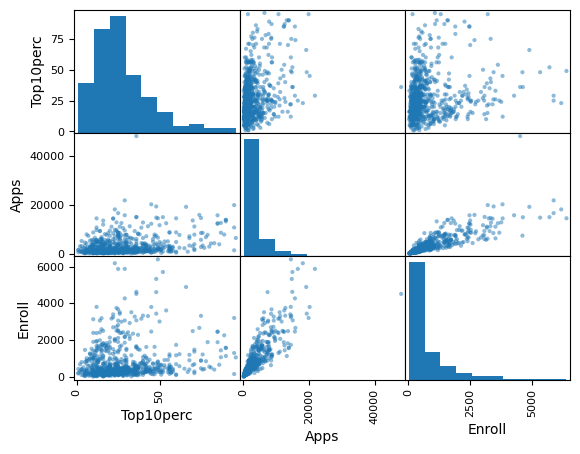

In [ ]:
## Opción 1 (sugerida en el libro)
pd.plotting.scatter_matrix(college[["Top10perc","Apps","Enroll"]])


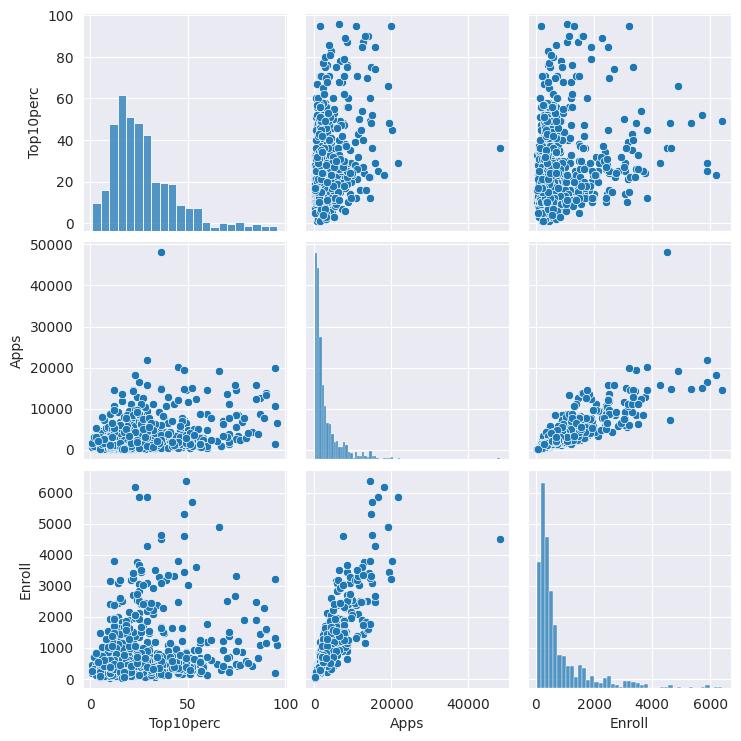

In [ ]:
# Opción 2 usando seaborn

sns.set_style("darkgrid")
sns.pairplot(college[["Top10perc","Apps","Enroll"]])

plt.show()

## e) Boxplot de `Outstate` y `Private`

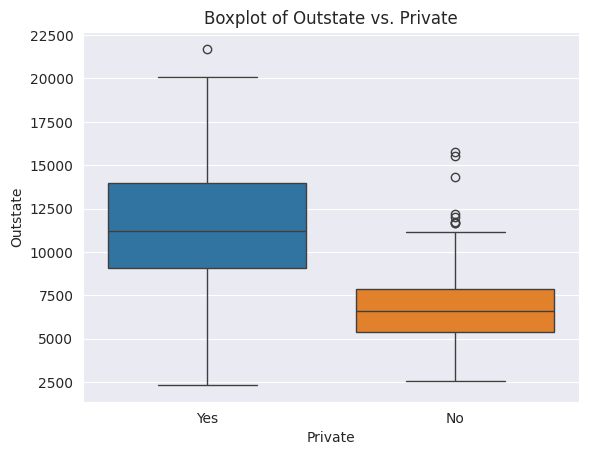

In [ ]:
#Opción 1 usando seaborn
sns.set_style("darkgrid")
sns.boxplot(x='Private', y='Outstate', data=college, hue="Private")

plt.xlabel('Private')
plt.ylabel('Outstate')
plt.title('Boxplot of Outstate vs. Private')
plt.show()

In [ ]:
# Opción 2 usando plotly express
fig = px.box(college, x="Private", y="Outstate", color= "Private", title="Boxplot of Outstate vs. Private")
fig.show()

## f) Analizando universidades `Elite`

In [ ]:
college['Elite'] = pd.cut(college['Top10perc'], [0,0.5,1],labels=['No', 'Yes']).fillna("No")
college.head(3)

Private  Apps  Accept  Enroll  Top10perc  \
College                                                                 
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
College                                                                       
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   

                              Room.Board  Books  Personal  PhD  Terminal  \
College                                                                    
Abilene Christian University        3300    450      2200   70        78   
Adelphi University                  6450    750      1500   29        30   
Adrian College                      3750    400      1165   53        66   

                              S.F.Ratio  perc.alumni  Expend  Grad.Rate Elite  
College                                                                        
Abilene Christian University       18.1           12    7041         60    No  
Adelphi University                 12.2           16   10527         56    No  
Adrian College                     12.9           30    8735         54    No

In [ ]:
college.Elite.value_counts()

Elite
No     774
Yes      3
Name: count, dtype: int64

In [ ]:
# Opción 2 usando plotly express
fig = px.box(college, x="Elite", y="Outstate", color= "Elite", title="Boxplot of Outstate vs. Elite")
fig.show()

/home/dalopeza/.local/share/virtualenvs/Taller1_Estadistica-hEzBuzBD/lib/python3.11/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## g) Histograma de algunas variables cuanitativas

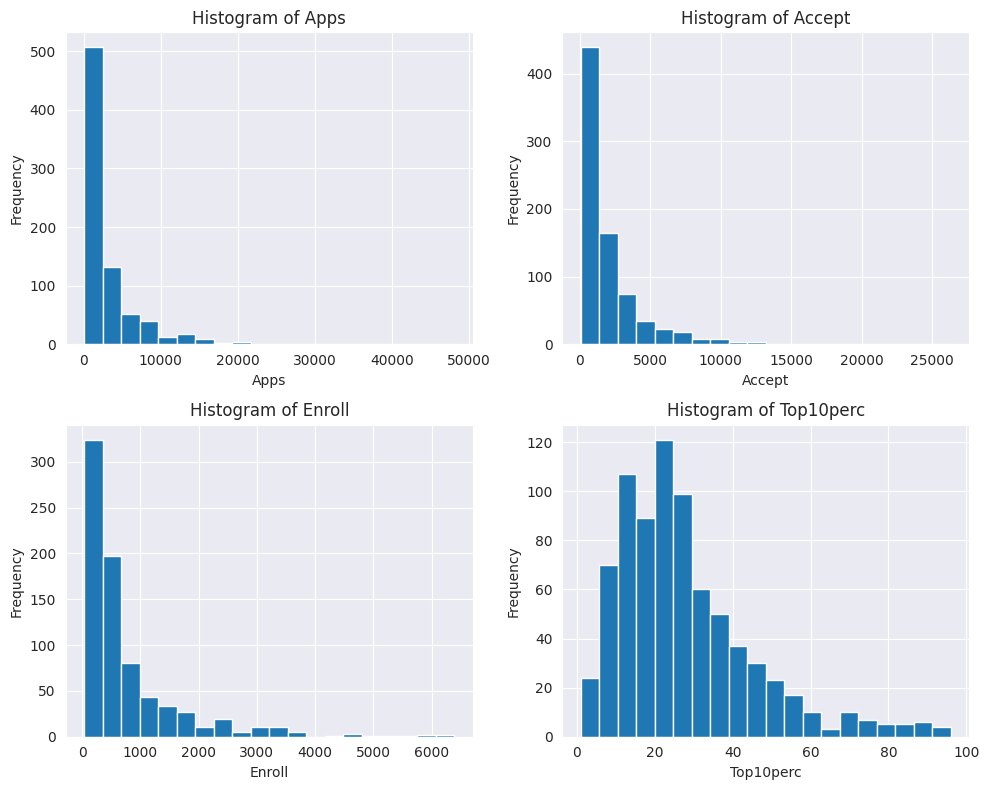

In [ ]:
# Define the quantitative variables you want to plot
quantitative_vars = ['Apps', 'Accept', 'Enroll', 'Top10perc']

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Iterate through the variables and plot histograms with different numbers of bins
for i, var in enumerate(quantitative_vars):
    row = i // 2
    col = i % 2
    ax = axes[row][col]

    # You can change the number of bins as needed
    ax.hist(college[var], bins=20)  # Change the number of bins (e.g., bins=10, bins=30) as desired
    ax.set_title(f'Histogram of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

# Adjust the layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()


## h) Exploring the data

In [ ]:
# Opción 2 usando plotly express
fig = px.box(college, x="Private", y="Expend", color= "Private", title="Boxplot of Outstate vs. Elite")#,points=False)
fig.show()

# Problema 14 sección 3.7 ejercicio 10


In [53]:
from ISLP import load_data
import statsmodels.formula.api as smf

In [54]:
Boston = load_data("Carseats")

### a) Fit a multiple regression model to predict Sales using Price, Urban, and US.


In [55]:
X = Boston[["Price", "Urban", "US", "Sales"]]
X.head()

Price Urban   US  Sales
0    120   Yes  Yes   9.50
1     83   Yes  Yes  11.22
2     80   Yes  Yes  10.06
3     97   Yes  Yes   7.40
4    128   Yes   No   4.15

In [56]:
model = smf.ols(formula="Sales ~ Price + Urban + US", data=X)
result = model.fit()

In [57]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sat, 04 Nov 2023   Prob (F-statistic):           2.39e-23
Time:                        00:22:38   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

### (b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!


- El coeficiente de "Price" es -0.0545, es decir, por cada unidad que aumenta el precio, las ventas disminuyen en 0.0545 unidades.
- Debido a que usamos variables categóricas para las columnas "Urban" y "US", para cada columna, el modelo utiliza "k-1" niveles. Como la columna "Urban" tiene 2 niveles ("Yes" y "No"), el modelo solo utiliza 1 nivel para el valor "Yes". Lo mismo sucede para la columna "US". Es decir que para ambos casos, el modelo utiliza el nivel "No" como referencia.
  - El coeficiente de "Urban[T.Yes]" significa que "un cambio desde 'No' hasta 'Yes' disminuye en 0.0219 unidades el valor de la venta".
  - El coeficiente de "US[T.Yes]" significa que "un cambio desde 'No' hasta 'Yes' incrementa en 1.2006 unidades el valor de la venta".


### (c) Write out the model in equation form, being careful to handle the qualitative variables properly.


Sales = 13.0435 - 0.0545 _ Price - 0.0219 _ Urban[T.Yes] + 1.2006 \* US[T.Yes]


### (d) For which of the predictors can you reject the null hypothesis H0 : Bj = 0?


El valor p para todos los predictores excepto para "Urban[T.Yes]" es muy pequeño, por lo que podemos rechazar la hipótesis nula para todos los predictores excepto para "Urban[T.Yes]".


### (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.


In [58]:
model2 = smf.ols(formula="Sales ~ Price + US", data=X)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sat, 04 Nov 2023   Prob (F-statistic):           2.66e-24
Time:                        00:22:38   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

### (f) How well do the models in (a) and (e) fit the data?


Ambos modelos dan un R^2 de 0.239, por lo que ambos modelos explican el 23.9% de la variabilidad de los datos. Sin embargo, por el principio de parsimonia, nos podemos quedar con el segundo modelo.


### (g) Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).


- Para el intercepto, el intervalo de confianza del 95% es [11.790, 14.271]
- Para "US[T.Yes]" el intervalo de confianza del 95% es [0.692, 1.708]
- Para "Price" el intervalo de confianza del 95% es [-0.065, -0.044]


### (h) Is there evidence of outliers or high leverage observations in the model from (e)?


Debido a que la kurtosis es casi 3 (su valor real es 2.895), entonces no hay evidencia de outliers.


# Problema 14 sección 3.7 ejercicio 13


In [59]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import statsmodels.formula.api as smf

13. In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use the default random number generator with seed set to 1 prior to starting part (a) to ensure consistent results.


(a) Using the normal() method of your random number generator, create a vector, x, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, X.

(b) Using the normal() method, create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution—a normal distribution with mean zero and variance 0.25.


In [60]:
def calculate_Y(x, eps):
    return -1 + 0.5 * x + eps

In [61]:
random.seed(1)
a = 100
x = np.array([random.normalvariate(0, 1) for _ in range(a)])
eps = np.array([random.normalvariate(0, np.sqrt(0.25)) for _ in range(a)])
y = calculate_Y(x, eps)

(c) Using x and eps, generate a vector y according to the model
Y = −1+0.5X + e (3.39)
What is the length of the vector y? What are the values of β0 and β1 in this linear model?


In [62]:
length_y = len(y)

beta0 = -1
beta1 = 0.5

print(f"the length of the vector Y is: {length_y}")
print(f"β0 (intercept): {beta0}")
print(f"β1 (coeficiente para X): {beta1}")

the length of the vector Y is: 100
β0 (intercept): -1
β1 (coeficiente para X): 0.5


(d) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.


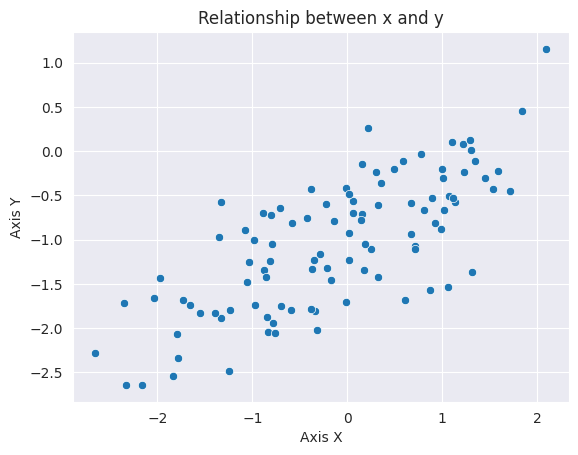

In [63]:
sb.scatterplot(x=x, y=y, marker="o")
plt.xlabel("Axis X")
plt.ylabel("Axis Y")
plt.title("Relationship between x and y")
plt.show()

Se observa una relación lineal positiva entre los datos


(e) Fit a least squares linear model to predict y using x. Comment on the model obtained. How do βˆ0 and βˆ1 compare to β0 and β1?


In [64]:
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     119.8
Date:                Sat, 04 Nov 2023   Prob (F-statistic):           1.08e-18
Time:                        00:22:39   Log-Likelihood:                -72.455
No. Observations:                 100   AIC:                             148.9
Df Residuals:                      98   BIC:                             154.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9733      0.051    -19.168      0.0

(f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a diferent color. Use the legend() method of the axes to create an appropriate legend.


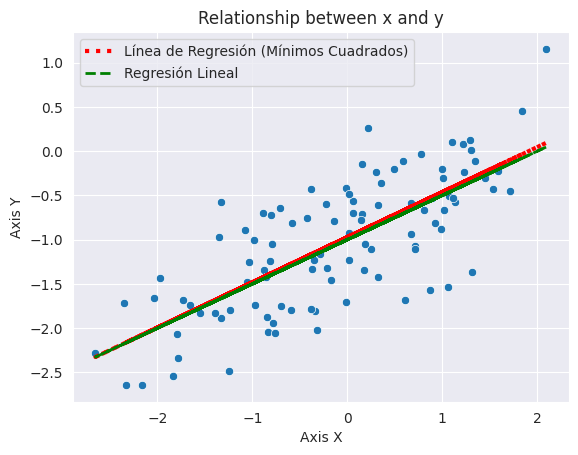

In [65]:
a, b = results.params
sb.scatterplot(x=x, y=y, marker="o")
y_pred_min_cuad = a + b * x
y_real = beta0 + beta1 * x
plt.plot(
    x,
    y_pred_min_cuad,
    color="red",
    linestyle=":",
    label="Línea de Regresión (Mínimos Cuadrados)",
    lw=3,
)
plt.plot(x, y_real, color="green", linestyle="--", label="Regresión Lineal", lw=2)
plt.xlabel("Axis X")
plt.ylabel("Axis Y")
plt.title("Relationship between x and y")
plt.legend()
plt.show()

(g) Now fit a polynomial regression model that predicts y using x and x2. Is there evidence that the quadratic term improves the model ft? Explain your answer.


In [66]:
data = {"x": x, "y": y}
res2 = smf.ols(formula="y ~ np.power(x,2) + x", data=data).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     59.41
Date:                Sat, 04 Nov 2023   Prob (F-statistic):           1.43e-17
Time:                        00:22:39   Log-Likelihood:                -72.406
No. Observations:                 100   AIC:                             150.8
Df Residuals:                      97   BIC:                             158.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.9869      0.067    -14.

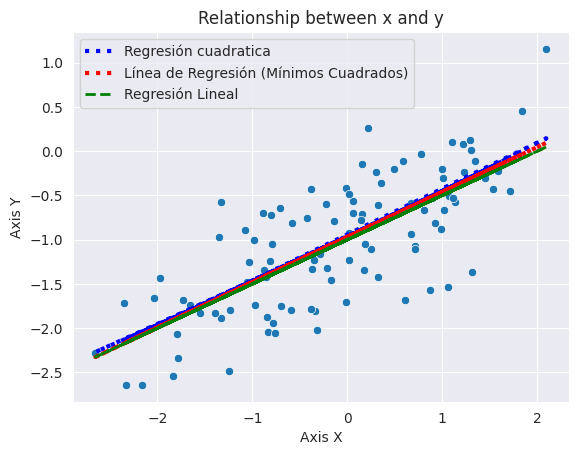

In [67]:
d, e, f = res2.params
sb.scatterplot(x=x, y=y, marker="o")
y_pred_min_cuad = a + b * x
y_real = beta0 + beta1 * x
y_pred_quadratic = d + f * x + e * np.power(x, 2)
plt.plot(
    x, y_pred_quadratic, color="blue", linestyle=":", label="Regresión cuadratica", lw=3
)
plt.plot(
    x,
    y_pred_min_cuad,
    color="red",
    linestyle=":",
    label="Línea de Regresión (Mínimos Cuadrados)",
    lw=3,
)
plt.plot(x, y_real, color="green", linestyle="--", label="Regresión Lineal", lw=2)
plt.xlabel("Axis X")
plt.ylabel("Axis Y")
plt.title("Relationship between x and y")
plt.legend()
plt.show()

El modelo cuadrativo mejora el modelo en 0.001 con respecto al modelo de regresión lineal en el indicador R-squared, sin emabrgo esto implica aumentar la complejidad del modelo y bajo el principio de parcimonia se adopta el modelo de menor complejidad.


(h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term" in (b). Describe your results.


the length of the vector Y is: 100
β0 (intercept): -1
β1 (coeficiente para X): 0.5


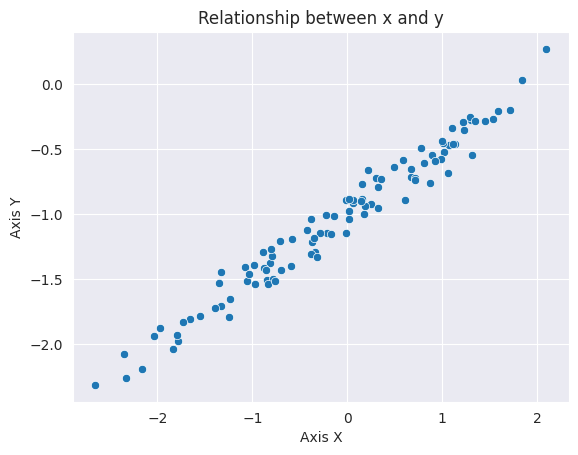

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     2904.
Date:                Sat, 04 Nov 2023   Prob (F-statistic):           1.24e-74
Time:                        00:22:40   Log-Likelihood:                 88.489
No. Observations:                 100   AIC:                            -173.0
Df Residuals:                      98   BIC:                            -167.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9947      0.010    -97.945      0.0

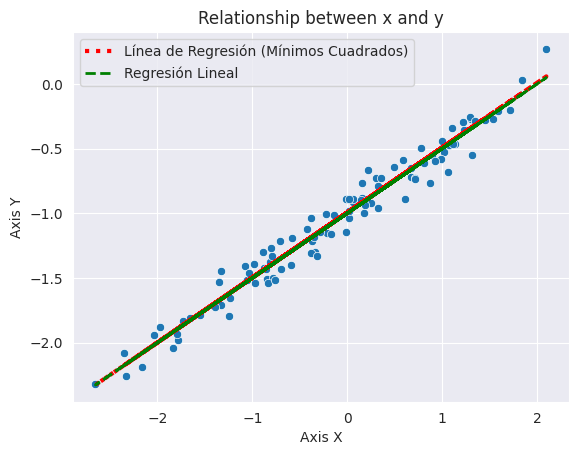

In [68]:
random.seed(1)
a = 100
x = np.array([random.normalvariate(0, 1) for _ in range(a)])
eps = np.array([random.normalvariate(0, np.sqrt(0.01)) for _ in range(a)])
y = calculate_Y(x, eps)

length_y = len(y)

beta0 = -1
beta1 = 0.5

print(f"the length of the vector Y is: {length_y}")
print(f"β0 (intercept): {beta0}")
print(f"β1 (coeficiente para X): {beta1}")

sb.scatterplot(x=x, y=y, marker="o")
plt.xlabel("Axis X")
plt.ylabel("Axis Y")
plt.title("Relationship between x and y")
plt.show()


X = sm.add_constant(x)
model = sm.OLS(y, X)
results_less_noisy = model.fit()
print(results_less_noisy.summary())

a, b = results_less_noisy.params
sb.scatterplot(x=x, y=y, marker="o")
y_pred_min_cuad = a + b * x
y_real = beta0 + beta1 * x
plt.plot(
    x,
    y_pred_min_cuad,
    color="red",
    linestyle=":",
    label="Línea de Regresión (Mínimos Cuadrados)",
    lw=3,
)
plt.plot(x, y_real, color="green", linestyle="--", label="Regresión Lineal", lw=2)
plt.xlabel("Axis X")
plt.ylabel("Axis Y")
plt.title("Relationship between x and y")
plt.legend()
plt.show()

Se evidencia que ante unos datos más homogeneos se obtiene una regresión lineal con mejor desempeño.


(i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term " in (b). Describe your results.


the length of the vector Y is: 100
β0 (intercept): -1
β1 (coeficiente para X): 0.5


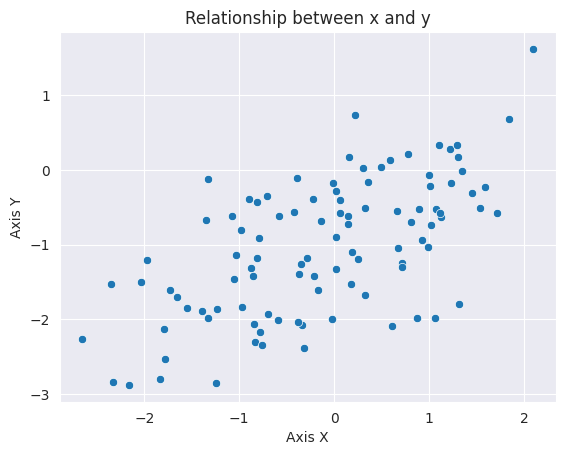

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     60.87
Date:                Sat, 04 Nov 2023   Prob (F-statistic):           6.69e-12
Time:                        00:22:40   Log-Likelihood:                -107.11
No. Observations:                 100   AIC:                             218.2
Df Residuals:                      98   BIC:                             223.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9622      0.072    -13.400      0.0

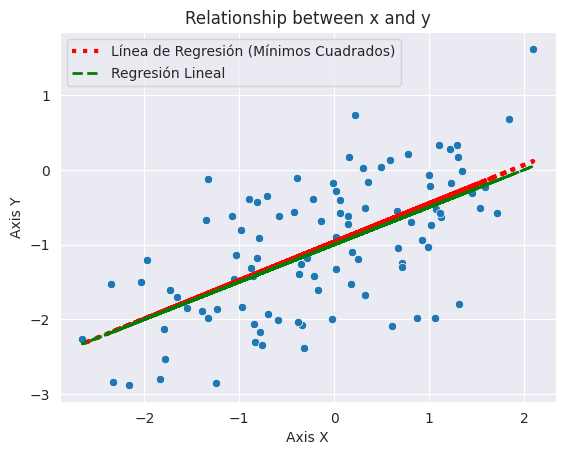

In [69]:
random.seed(1)
a = 100
x = np.array([random.normalvariate(0, 1) for _ in range(a)])
eps = np.array([random.normalvariate(0, np.sqrt(0.5)) for _ in range(a)])
y = calculate_Y(x, eps)

length_y = len(y)

beta0 = -1
beta1 = 0.5

print(f"the length of the vector Y is: {length_y}")
print(f"β0 (intercept): {beta0}")
print(f"β1 (coeficiente para X): {beta1}")

sb.scatterplot(x=x, y=y, marker="o")
plt.xlabel("Axis X")
plt.ylabel("Axis Y")
plt.title("Relationship between x and y")
plt.show()


X = sm.add_constant(x)
model = sm.OLS(y, X)
results_noisy = model.fit()
print(results_noisy.summary())

a, b = results_noisy.params
sb.scatterplot(x=x, y=y, marker="o")
y_pred_min_cuad = a + b * x
y_real = beta0 + beta1 * x
plt.plot(
    x,
    y_pred_min_cuad,
    color="red",
    linestyle=":",
    label="Línea de Regresión (Mínimos Cuadrados)",
    lw=3,
)
plt.plot(x, y_real, color="green", linestyle="--", label="Regresión Lineal", lw=2)
plt.xlabel("Axis X")
plt.ylabel("Axis Y")
plt.title("Relationship between x and y")
plt.legend()
plt.show()

Se evidencia que ante unos datos más dispersos de obtiene un indicador R-squared con menor desempeño.


(j) What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.


In [70]:
original_b0, original_b1 = results.conf_int(alpha=0.05, cols=None)
less_noisy_b0, less_noisy_b1 = results_less_noisy.conf_int(alpha=0.05, cols=None)
noisy_b0, noisy_b1 = results_noisy.conf_int(alpha=0.05, cols=None)

In [71]:
print(f"el intervalo de confianza para el data set original de β0 es: {original_b0}")
print(f"el intervalo de confianza para el data set original de β1 es: {original_b1}")
print(
    f"el intervalo de confianza para el data con menos ruido de β0 es: {less_noisy_b0}"
)
print(
    f"el intervalo de confianza para el data con menos ruido de β1 es: {less_noisy_b1}"
)
print(f"el intervalo de confianza para el data set original de β0 es: {noisy_b0}")
print(f"el intervalo de confianza para el data set original de β1 es: {noisy_b1}")

el intervalo de confianza para el data set original de β0 es: [-1.07406523 -0.87253578]
el intervalo de confianza para el data set original de β1 es: [0.41742068 0.60228409]
el intervalo de confianza para el data con menos ruido de β0 es: [-1.01481305 -0.97450716]
el intervalo de confianza para el data con menos ruido de β1 es: [0.48348414 0.52045682]
el intervalo de confianza para el data set original de β0 es: [-1.10474406 -0.81973837]
el intervalo de confianza para el data set original de β1 es: [0.38321521 0.64465154]


In [72]:
diff_orignal_b0 = original_b0[1] - original_b0[0]
diff_orignal_b1 = original_b1[1] - original_b1[0]

diff_less_noisy_b0 = less_noisy_b0[1] - less_noisy_b0[0]
diff_less_noisy_b1 = less_noisy_b1[1] - less_noisy_b1[0]

diff_noisy_b0 = noisy_b0[1] - noisy_b0[0]
diff_noisy_b1 = noisy_b1[1] - noisy_b1[0]

In [73]:
print(f"rango del intervalo de confianza original b0: {diff_orignal_b0}")
print(f"rango del intervalo de confianza original b1: {diff_orignal_b1}")
print(f"rango del intervalo de confianza less noisy b0: {diff_less_noisy_b0}")
print(f"rango del intervalo de confianza less noisy b1: {diff_less_noisy_b1}")
print(f"rango del intervalo de confianza noisy b0: {diff_noisy_b0}")
print(f"rango del intervalo de confianza noisy b1: {diff_noisy_b1}")

rango del intervalo de confianza original b0: 0.20152945699938984
rango del intervalo de confianza original b1: 0.18486340641561166
rango del intervalo de confianza less noisy b0: 0.04030589139987795
rango del intervalo de confianza less noisy b1: 0.036972681283122366
rango del intervalo de confianza noisy b0: 0.2850056913062228
rango del intervalo de confianza noisy b1: 0.2614363365394474


Cuando el error es pequeño el rango del intervalo de confianza es más pequeño y cuando el error es más grande el rango del intervalo de confianza es mayor


# Problema 14 sección 3.7 ejercicio 14


In [74]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [75]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

a) La última línea corresponde a la creación de un modelo lineal en el que y es una función de x1 y x2. Escriba la forma del modelo lineal. ¿Cuáles son los coeficientes de regresión?


In [76]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Aquí utilizo las dos librerias de numpy y statsmodels para generar la regresión lineal


In [77]:
# Generar los datos
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

# Crear el modelo de regresión lineal
model = LinearRegression().fit(np.column_stack((x1, x2)), y)

# Extraer los coeficientes
intercept = model.intercept_
coefficients = model.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: 1.957909291136691
Coefficients: [1.6153677 0.9427767]


In [78]:
# Generar los datos
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

df = pd.DataFrame({"x1": x1, "x2": x2, "y": y})

model = sm.OLS(y, sm.add_constant(df[["x1", "x2"]])).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Sat, 04 Nov 2023   Prob (F-statistic):           5.76e-08
Time:                        00:22:41   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.0

b) ¿Cuál es la correlación entre x1 y x2? Crear un diagrama de dispersión mostrando la relación entre las variables.


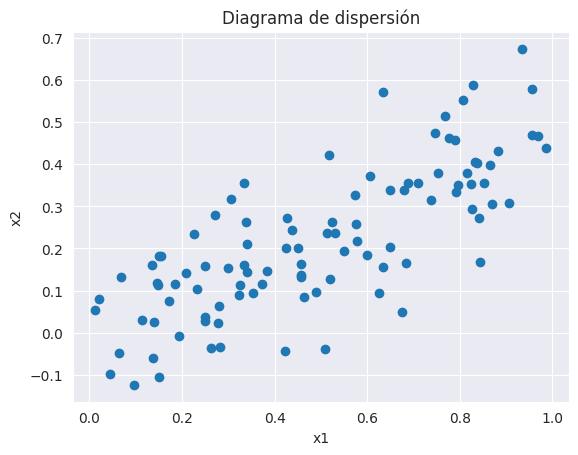

Correlación entre x1 y x2: 0.772324497691354


In [79]:
# Generar los datos
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

# Calcular la correlación
corr = np.corrcoef(x1, x2)[0, 1]

# Crear el diagrama de dispersión
plt.scatter(x1, x2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Diagrama de dispersión")
plt.show()

print("Correlación entre x1 y x2:", corr)

C) Usando estos datos, ajuste una regresión de mínimos cuadrados para predecir el uso de y x1 y x2. Describa los resultados obtenidos. Que es B0, B1 y B2 ? Cómo se relacionan con los verdaderos B0, B1 y B3 ? ¿Puedes rechazar la hipótesis nula de que H0 : B1 = 0 ? Puedes rechazar la hipótesis nula de que H0 : B2 = 0 ?


In [80]:
# Generar los datos
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

# Crear un DataFrame con los datos
df = pd.DataFrame({"x1": x1, "x2": x2, "y": y})

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, sm.add_constant(df[["x1", "x2"]])).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Sat, 04 Nov 2023   Prob (F-statistic):           5.76e-08
Time:                        00:22:41   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.0

El valor p para la prueba de hipótesis de B1 es 0.000, lo que es menor que el nivel de significancia de 0.05. Por lo tanto, se puede rechazar la hipótesis nula de que B1 = 0. Esto indica que x1 tiene un efecto significativo en y.

El valor p para la prueba de hipótesis de B2 es 0.259, lo que es mayor que el nivel de significancia de 0.05. Por lo tanto, NO se puede rechazar la hipótesis nula de que B2 = 0.


d) Ahora ajuste una regresión de mínimos cuadrados para predecir y usando solo x1.
Comenta tus resultados. ¿Puedes rechazar la hipótesis nula H0: B1 = 0 ?


In [81]:
# Generar los datos
# Generar los datos
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

# Crear un DataFrame con los datos
df = pd.DataFrame({"x1": x1, "x2": x2, "y": y})

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, sm.add_constant(df["x1"])).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Sat, 04 Nov 2023   Prob (F-statistic):           1.37e-08
Time:                        00:22:41   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9371      0.189     10.242      0.0

El valor p para la prueba de hipótesis de B1 es 0.000, lo que es menor que el nivel de significancia de 0.05. Por lo tanto, se puede rechazar la hipótesis nula de que B1 = 0. Esto indica que x1 tiene un efecto significativo en y.


e) Ahora ajuste una regresión de mínimos cuadrados para predecir y usando solo x2.
Comenta tus resultados. ¿Puedes rechazar la hipótesis nula H0: B1 = 0 ?


In [82]:
# Generar los datos
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

# Crear un DataFrame con los datos
df = pd.DataFrame({"x1": x1, "x2": x2, "y": y})

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, sm.add_constant(df["x2"])).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Sat, 04 Nov 2023   Prob (F-statistic):           7.43e-07
Time:                        00:22:41   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3239      0.154     15.124      0.0

El valor p para la prueba de hipótesis de B1 es 0.000, lo que es menor que el nivel de significancia de 0.05. Por lo tanto, se puede rechazar la hipótesis nula de que B1 = 0. Esto indica que x2 tiene un efecto significativo en y.


g) Supongamos que obtenemos una observación adicional, que fue por desgracia
medición incorrecta. Usamos la función np.concatenate() para agregar
esta observación adicional a cada uno de x1, x2 y y.

Reajuste los modelos lineales de (c) a (e) utilizando estos nuevos datos. ¿Qué
efecto tiene esta nueva observación en cada uno de los modelos?
En cada modelo, ¿es esta observación un valor atípico? Un alto apalancamiento
punto? Ambos? Explique sus respuestas.


Ajuste del punto C


In [83]:
# Generar los datos
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

# Ajustar la regresión de mínimos cuadrados
X = np.column_stack((np.ones_like(x1), x1, x2))
beta = np.linalg.lstsq(X, y, rcond=None)[0]

# Imprimir los resultados
print("Coeficientes de la regresión:")
print("Intercepto:", beta[0])
print("Coeficiente de x1:", beta[1])
print("Coeficiente de x2:", beta[2])

Coeficientes de la regresión:
Intercepto: 2.061791259758457
Coeficiente de x1: 0.8575448183694927
Coeficiente de x2: 2.2663234876910465


Ajuste del punto e


In [84]:
# Generar los datos
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

# Ajustar la regresión de mínimos cuadrados
X = np.column_stack((np.ones_like(x2), x2))
beta = np.linalg.lstsq(X, y, rcond=None)[0]

# Imprimir los resultados
print("Coeficientes de la regresión:")
print("Intercepto:", beta[0])
print("Coeficiente de x1:", beta[1])

Coeficientes de la regresión:
Intercepto: 2.2840118640185625
Coeficiente de x1: 3.1458486275754862


Considero que generó un gran cambio en los coeficientes de los modelos, lo que puede implicar que el valor agregado en la variable x1 es un valor atipico generando este gran cambio. Esto lo podemos evidenciar en el modelo del punto C Vs el modelo del punto C ajustado. Para el punto e seria lo contrario, no afecta tanto el modelo, lo que significa que el dato agregado en la variable x2 que se agregaron no son atipicos
